In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")   

In [27]:
# Загрузка данных
data = pd.read_csv("./dataset/clusterisation_dataset.csv")

# Определение колонок
numeric_columns = [
    "price", "freight_value", "total_spent",
    "review_score", "time_btw_purch_approve", 
    "time_btw_approval_delivery_to_carrier",
    "time_btw_carrier_customer", "time_btw_customer_est_date",
    "time_btw_est_date_limit_date", "time_btw_customer_rewiew",
    "time_btw_rewiew_answer"
]

labels_columns = [
    "product_category_name_english", "payment_type",
    "customer_city",
]

for i in labels_columns:
    label_enc = LabelEncoder()
    data[i] = label_enc.fit_transform(data[i])

st_scaler = StandardScaler()
for i in numeric_columns:
    data[[i]] = st_scaler.fit_transform(data[[i]])

data


,customer_id,number_of_orders,price,freight_value,review_score,total_spent,product_category_name_english,payment_type,payment_installments,customer_city,time_btw_purch_approve,time_btw_approval_delivery_to_carrier,time_btw_carrier_customer,time_btw_customer_est_date,time_btw_est_date_limit_date,time_btw_customer_rewiew,time_btw_rewiew_answer
0,00012a2ce6f8dcda20d059ce98491703,1,-0.189259,0.300313,-2.461880,-0.149949,69,1,1,2564,-0.477466,0.047884,0.196164,-0.581699,0.567736,0.126755,0.238078
1,000161a058600d5901f007fab4c27140,1,-0.374078,-0.489436,-0.122555,-0.227482,43,1,1,1782,-0.487560,0.170686,-0.381517,-0.199659,0.302361,0.097301,-0.141033
2,0001fd6190edaaf884bcaf3d49edf079,1,0.288358,-0.303912,0.657219,-0.017783,6,1,1,2513,-0.492471,-0.462475,-0.526665,0.434774,0.192350,0.187405,-0.216669
3,0002414f95344307404f0ace7a26f1d5,1,0.129011,0.586859,0.657219,-0.044108,20,0,0,2270,0.183395,-0.125555,1.849041,-1.094241,-0.545840,0.087012,-0.216487
4,000379cdec625522490c315e70c7a9fb,1,-0.172313,-0.394133,-0.122555,-0.162612,7,0,0,3552,1.325603,-0.619138,-0.024574,-0.699775,1.085065,0.084743,-0.031131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95216,fffcb937e9dd47a13f05ecb8290f4d3e,1,-0.251748,-0.400486,0.657219,-0.187348,8,1,1,3552,-0.467074,-0.602716,-0.604061,0.292850,0.378418,0.093212,0.677769
95217,fffecc9f79fd8c764f843e9951b11341,3,-0.374078,0.396887,-0.902330,-0.204630,7,3,0,2683,-0.490523,-0.257707,0.093915,0.499112,-0.594379,0.111834,0.053915
95218,fffeda5b6d849fbd39689bb92087f431,1,-0.411148,-0.316619,-0.122555,-0.234493,68,1,1,3117,-0.484380,0.054599,0.563274,0.891682,-1.658668,0.105419,0.164427
95219,ffff42319e9b2d713724ae527742af25,1,0.393795,-0.380155,0.657219,0.012867,7,1,1,3730,-0.480551,-0.207531,-0.727645,-0.494605,0.920846,0.100976,-0.227115


<Axes: >

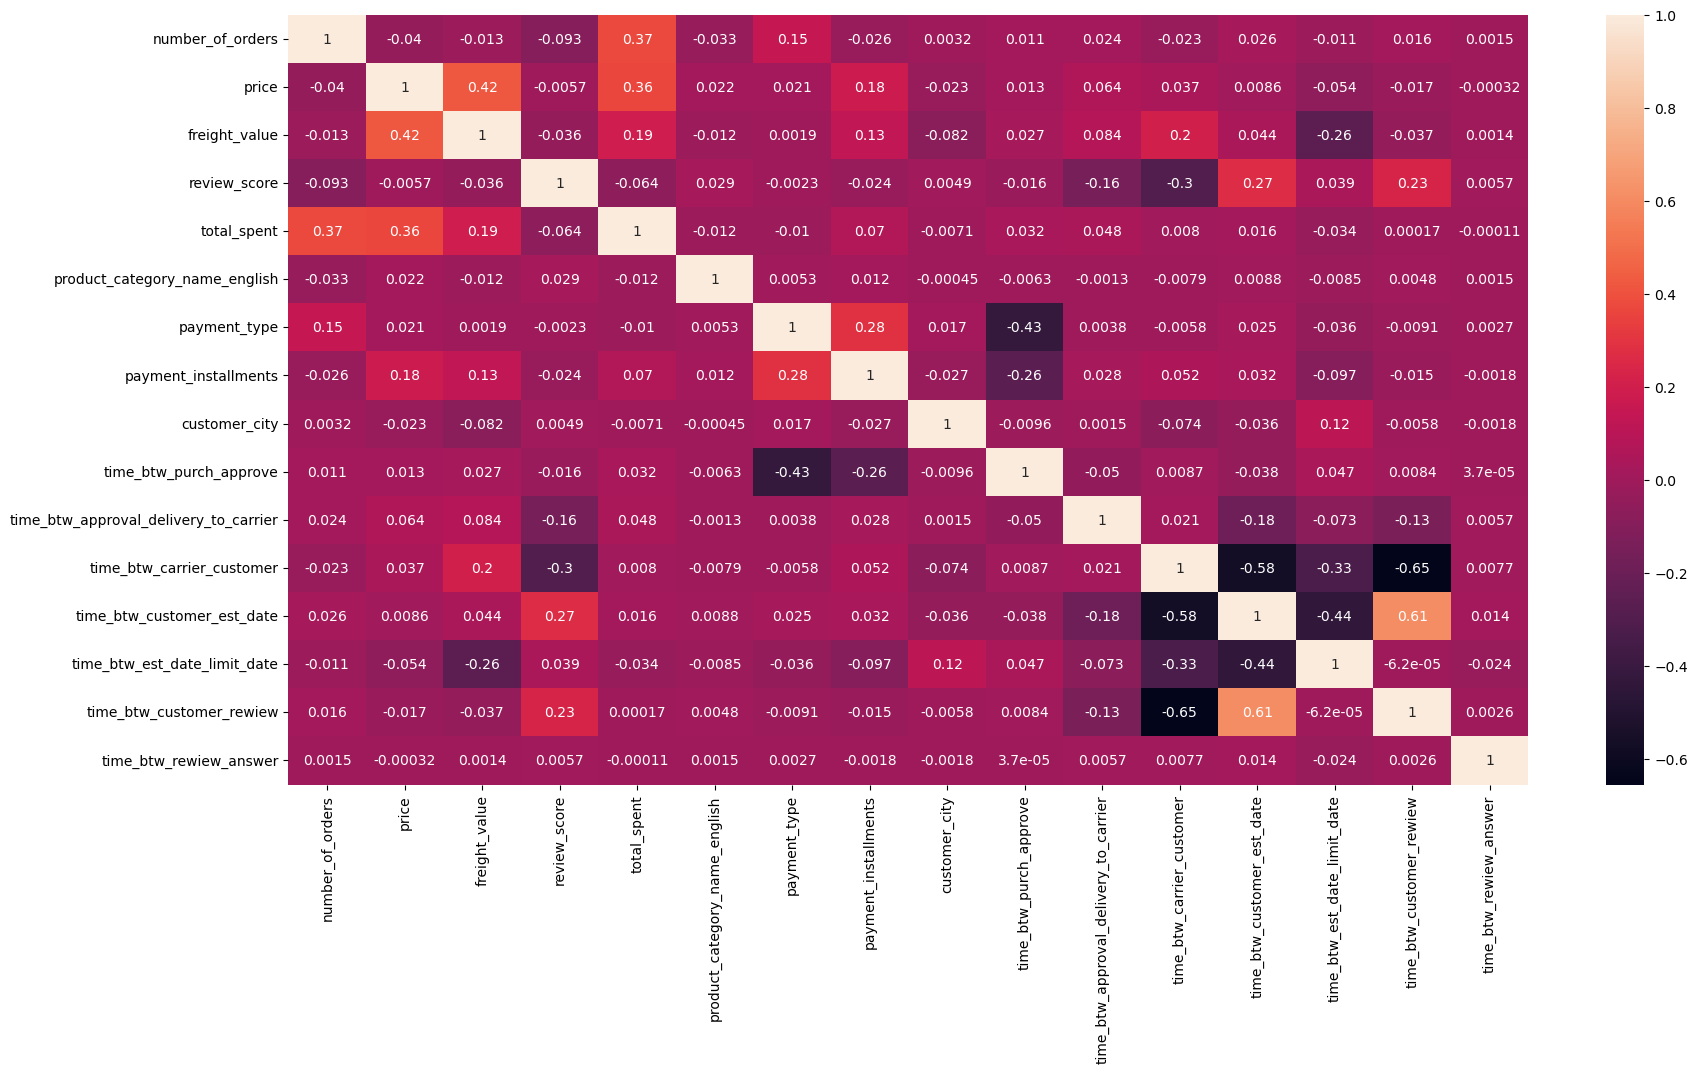

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
sns.heatmap(data.iloc[:,1:].corr(), annot=True)

In [29]:
X = data.iloc[:,1:]
X

,number_of_orders,price,freight_value,review_score,total_spent,product_category_name_english,payment_type,payment_installments,customer_city,time_btw_purch_approve,time_btw_approval_delivery_to_carrier,time_btw_carrier_customer,time_btw_customer_est_date,time_btw_est_date_limit_date,time_btw_customer_rewiew,time_btw_rewiew_answer
0,1,-0.189259,0.300313,-2.461880,-0.149949,69,1,1,2564,-0.477466,0.047884,0.196164,-0.581699,0.567736,0.126755,0.238078
1,1,-0.374078,-0.489436,-0.122555,-0.227482,43,1,1,1782,-0.487560,0.170686,-0.381517,-0.199659,0.302361,0.097301,-0.141033
2,1,0.288358,-0.303912,0.657219,-0.017783,6,1,1,2513,-0.492471,-0.462475,-0.526665,0.434774,0.192350,0.187405,-0.216669
3,1,0.129011,0.586859,0.657219,-0.044108,20,0,0,2270,0.183395,-0.125555,1.849041,-1.094241,-0.545840,0.087012,-0.216487
4,1,-0.172313,-0.394133,-0.122555,-0.162612,7,0,0,3552,1.325603,-0.619138,-0.024574,-0.699775,1.085065,0.084743,-0.031131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95216,1,-0.251748,-0.400486,0.657219,-0.187348,8,1,1,3552,-0.467074,-0.602716,-0.604061,0.292850,0.378418,0.093212,0.677769
95217,3,-0.374078,0.396887,-0.902330,-0.204630,7,3,0,2683,-0.490523,-0.257707,0.093915,0.499112,-0.594379,0.111834,0.053915
95218,1,-0.411148,-0.316619,-0.122555,-0.234493,68,1,1,3117,-0.484380,0.054599,0.563274,0.891682,-1.658668,0.105419,0.164427
95219,1,0.393795,-0.380155,0.657219,0.012867,7,1,1,3730,-0.480551,-0.207531,-0.727645,-0.494605,0.920846,0.100976,-0.227115


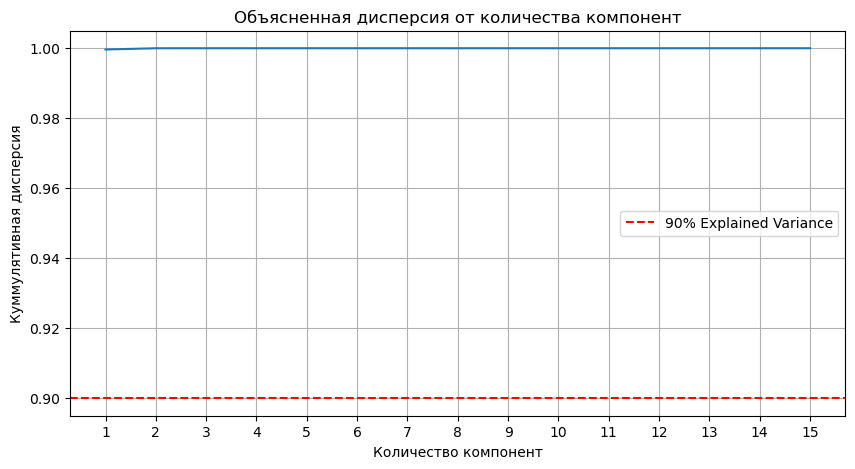

In [30]:
var_plot_data = list()

for i in range(1, 16):
    pca = PCA(n_components=i, random_state=42)
    pca.fit(X)
    var_plot_data.append(pca.explained_variance_ratio_)
    
num_components = list(range(1, len(var_plot_data) + 1))
explained_variance = [sum(var) for var in var_plot_data]

# Построение графика
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x=num_components, y=explained_variance, ax=axes)
plt.title(
    f'Объясненная дисперсия от количества компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Куммулятивная дисперсия')
plt.xticks(num_components)  # Отображение всех значений по оси X
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--',
            label='90% Explained Variance')  # Отметка для 90%
plt.legend()
plt.show()

In [36]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

<Axes: >

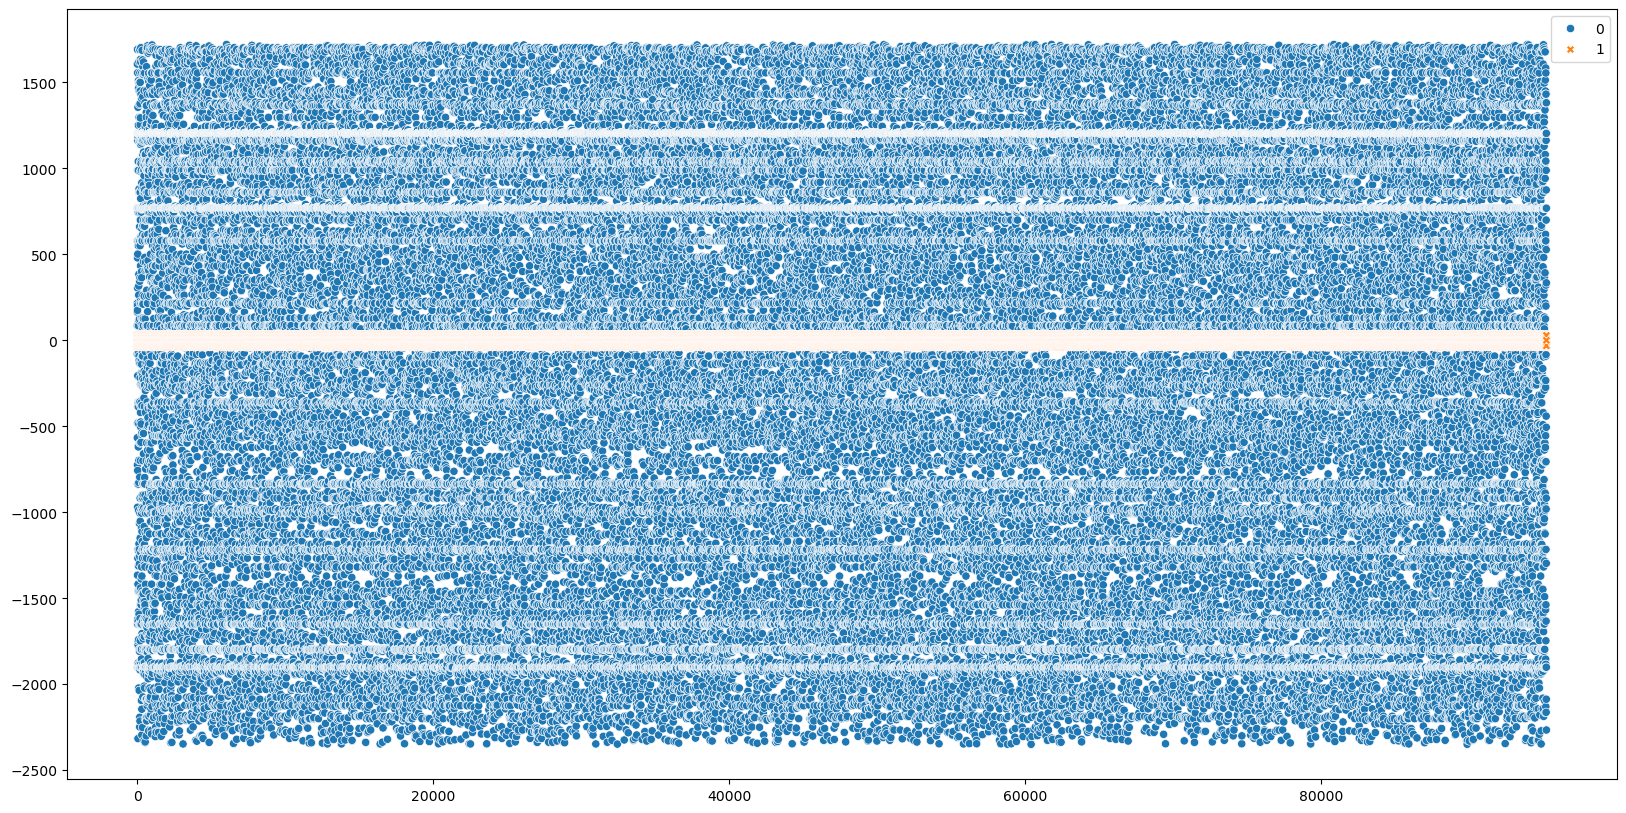

In [55]:
fig, axes = plt.subplots(1,1, figsize=(20, 10))
sns.scatterplot(X_transformed, ax=axes)

> лол можно просто разделить их по границе y = 0

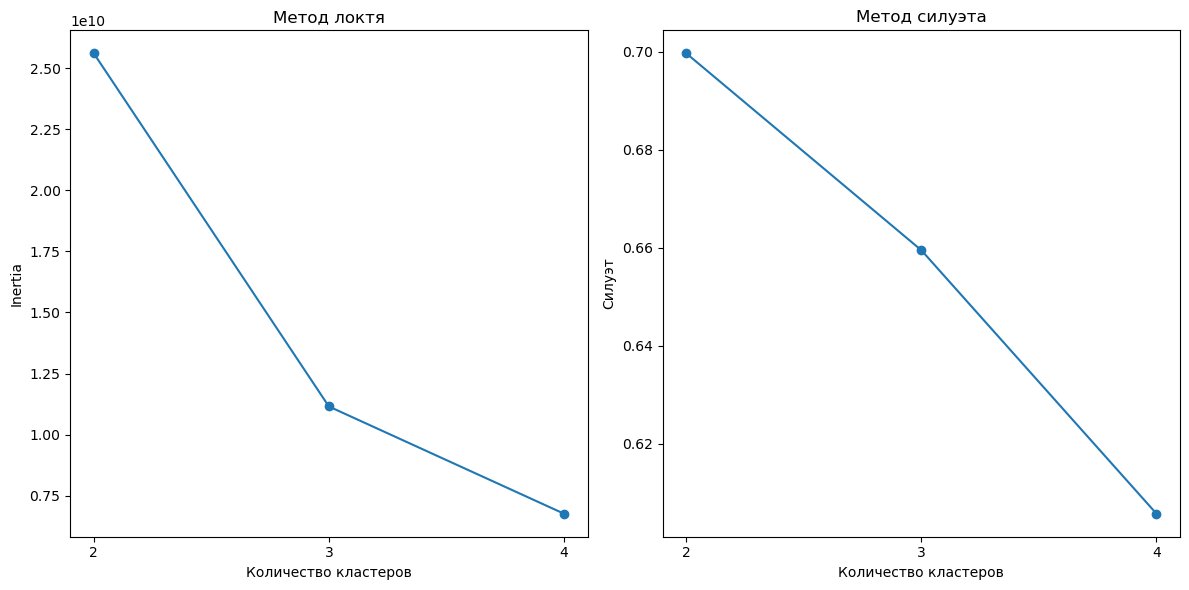

In [ ]:
# Метод локтя
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 5)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_transformed)
    
    inertia.append(kmeans.inertia_)
    
    # Предсказание кластеров и расчет коэффициента силуэта
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Визуализация метода локтя
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)

# Визуализация метода силуэта
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.xticks(range_n_clusters)

plt.tight_layout()
plt.show()

> метод силуэта показывает что наилучшее значение кластеров = 2

In [57]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_transformed)

KMeans(n_clusters=2, random_state=42)

In [58]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [62]:
X_labeled = pd.DataFrame(X_transformed)
X_labeled['labels'] = kmeans.labels_
X_labeled

,0,1,labels
0,215.126806,29.815901,1
1,-566.872897,3.813019,0
2,164.127367,-33.178822,1
3,-78.872982,-19.183317,1
4,1203.127440,-32.173127,1
...,...,...,...
95216,1203.127383,-31.170392,1
95217,334.127229,-32.182480,1
95218,768.126583,28.825073,1
95219,1381.127461,-32.168905,1


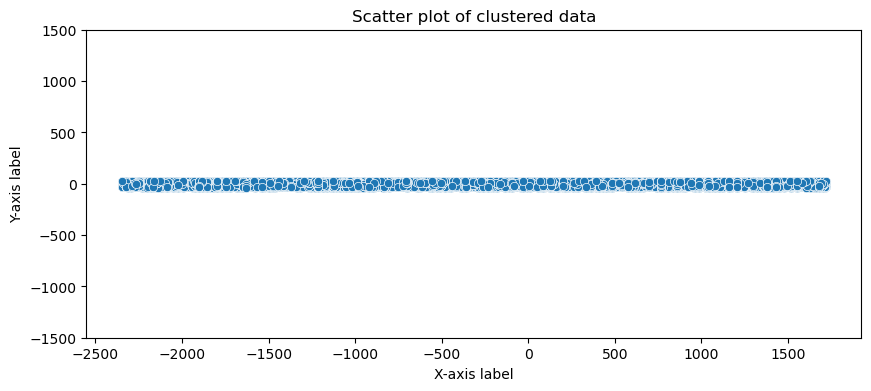

In [ ]:
# Создаем фигуру и оси для графика
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

# Отображаем график рассеяния
sns.scatterplot(ax=axes, x=X_labeled[0], y=X_labeled[1])

# Устанавливаем заголовок и метки осей (по желанию)
axes.set_title("Scatter plot of clustered data")
axes.set_xlabel("X-axis label")
axes.set_ylabel("Y-axis label")
axes.set_ylim(-1500, 1500)

plt.show()  # Отображаем график

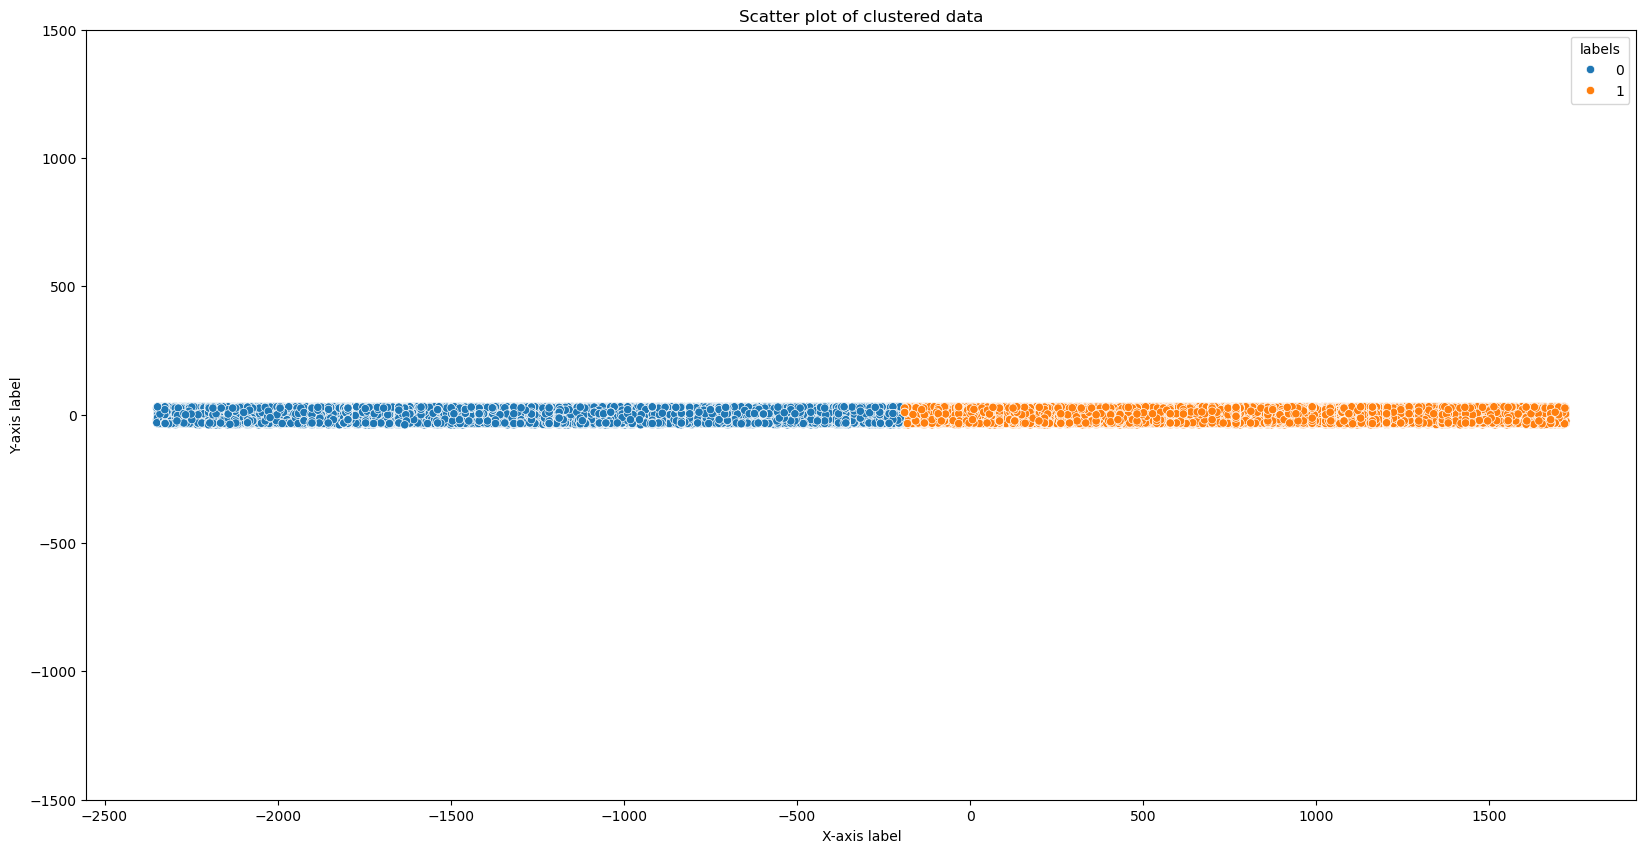

In [85]:
# Предположение о том, что X_transformed содержит ваши данные
X_labeled = pd.DataFrame(X_transformed)
X_labeled['labels'] = kmeans.labels_

# Создаем фигуру и оси для графика
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

# Отображаем график рассеяния
sns.scatterplot(ax=axes, x=X_labeled[0], y=X_labeled[1], hue=X_labeled['labels'])

# Устанавливаем пределы оси Y
axes.set_ylim(-1500, 1500)  

# Устанавливаем заголовок и метки осей (по желанию)
axes.set_title("Scatter plot of clustered data")
axes.set_xlabel("X-axis label")
axes.set_ylabel("Y-axis label")

plt.show()  # Отображаем график

In [96]:
X_labeled['labels'].value_counts()

labels
1    55838
0    39383
Name: count, dtype: int64